In [4]:
import aiproteomics

In [5]:
import tensorflow as tf

# Load models

In [6]:
print('Building frag model')
from aiproteomics.frag.models import build_frag_transformer_model_slice0
model_frag = build_frag_transformer_model_slice0(
        num_layers = 6,                 # number of layers
        d_model = 512,
        num_heads = 8,                  # Number of attention heads
        d_ff = 2048,                    # Hidden layer size in feed forward network inside transformer
        dropout_rate = 0.1,             #
        vocab_size = 22,                # number of aminoacids
        max_len = 30                    # maximal peptide length
        )

# Load trained weights from (old) fragmentation transformer model
model_frag.load_weights('trained_transformer_frag/weight_49_0.25681.hdf5')

# Make a plot of the model
tf.keras.utils.plot_model(model_frag, show_shapes=True)

Building frag model


FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'trained_transformer_frag/weight_49_0.25681.hdf5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

Building iRT model


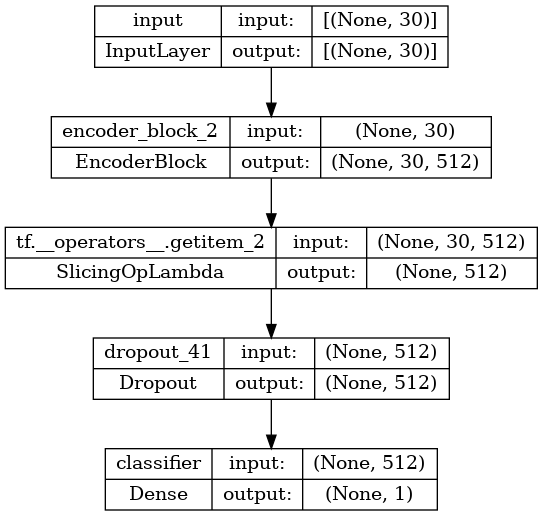

In [7]:
print('Building iRT model')
from aiproteomics.rt.models import build_rt_transformer_model

model_irt = build_rt_transformer_model(
        num_layers = 6,                 # number of layers
        d_model = 512,
        num_heads = 8,                  # Number of attention heads
        d_ff = 2048,                    # Hidden layer size in feed forward network inside transformer
        dropout_rate = 0.1,             #
        vocab_size = 22,                # number of aminoacids
        max_len = 30 
        )

# Don't have the weights right now but can uncomment when retrained
#model.load_weights('./trained_prosit_irt/weight_24_0.03205.hdf5')

# Make a plot of the model
tf.keras.utils.plot_model(model_irt, show_shapes=True)

## Read in the example list of peptides to process

In [5]:
!cat example.csv

modified_sequence,collision_energy,precursor_charge
MMPAAALIM(ox)R,35,3
MLAPPPIM(ox)K,30,2
MRALLLIPPPPM(ox)R,30,6


In [6]:
from aiproteomics.e2e.speclibgen import csv_to_msp

csv_to_msp('example.csv',
           'test.msp',
           model_frag=model_frag,
           model_irt=model_irt,
           batch_size_frag=1024,
           batch_size_iRT=1024,
           iRT_rescaling_mean = 56.35363441,
           iRT_rescaling_var = 1883.0160689
          )

2023-05-30 15:03:42.740087: E tensorflow/core/framework/node_def_util.cc:675] NodeDef mentions attribute epsilon which is not in the op definition: Op<name=_MklFusedBatchMatMulV2; signature=x:T, y:T, args:num_args*T -> output:T; attr=T:type,allowed=[DT_BFLOAT16, DT_FLOAT]; attr=adj_x:bool,default=false; attr=adj_y:bool,default=false; attr=num_args:int,min=0; attr=fused_ops:list(string),default=[]> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node model/encoder_block/encoder_layer/multi_head_attention/add}}


In [7]:
!cat test.msp

Name: MMPAAALIMR/3
MW: 374.19403587446
Comment: Parent=374.19403587446 Collision_energy=35.0 Mods=1/8,M,Oxidation ModString=MMPAAALIMR//Oxidation@M9/3 iRT=27.63136100769043
Num peaks: 22
175.118952167	0.4478343	"y1/0.0ppm"
132.047761467	0.0012691963	"b1/0.0ppm"
322.15434716699997	0.32797375	"y2/0.0ppm"
263.088246467	0.27696502	"b2/0.0ppm"
435.238411167	0.49965674	"y3/0.0ppm"
218.122843817	0.029959906	"y3^2)/0.0ppm"
360.141010467	0.024057517	"b3/0.0ppm"
548.322475167	0.54867864	"y4/0.0ppm"
274.664875817	0.06270932	"y4^2)/0.0ppm"
431.178124467	0.0121444585	"b4/0.0ppm"
216.092700467	0.0010822752	"b4^2)/0.0ppm"
144.39755913366665	0.0013124398	"b4^3)/0.0ppm"
619.359589167	1.0	"y5/0.0ppm"
310.183432817	0.11255463	"y5^2)/0.0ppm"
690.3967031669999	0.8682508	"y6/0.0ppm"
345.70198981699997	0.11513035	"y6^2)/0.0ppm"
761.4338171669999	0.35829362	"y7/0.0ppm"
381.22054681699996	0.08305371	"y7^2)/0.0ppm"
858.4865811669999	0.04886579	"y8/0.0ppm"
429.74692881699997	0.07552263	"y8^2)/0.0ppm"
286.8337113